In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data.alphadigits import BinaryAlphaDigitsDataset
from data.mnist import MNISTDataset
from torch.utils.data import DataLoader

In [2]:
restrict_labels = ['a', 'b', 'c', 'd']
input_size = 320 

## RBM

In [3]:
from principal_RBM_alpha import init_RBM, train_RBM, generer_image_RBM

Epoch 1 - Reconstruction error: 0.20903158166810804
Epoch 101 - Reconstruction error: 0.008143433156045229
Epoch 201 - Reconstruction error: 0.0025641142994127365
Epoch 301 - Reconstruction error: 0.0011965856378009954
Epoch 401 - Reconstruction error: 0.0008077447460975759
Epoch 501 - Reconstruction error: 0.00046120284475267007
Epoch 601 - Reconstruction error: 0.00034402092378237324
Epoch 701 - Reconstruction error: 0.00020515616570169204
Epoch 801 - Reconstruction error: 0.00017881009923621644
Epoch 901 - Reconstruction error: 0.0001778881662553871
Epoch 1001 - Reconstruction error: 0.00010725074215962807


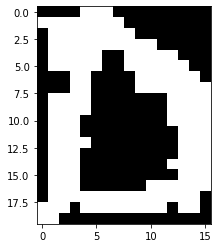

In [4]:
rbm = init_RBM(input_size, 100)
rbm = train_RBM(rbm, epochs=1001,
                ds=BinaryAlphaDigitsDataset(restrict_labels=restrict_labels))
generer_image_RBM(rbm, num_iterations=500, num_images=1)

## DBN

Training RBM 1
Epoch 1 - Reconstruction error: 0.22530879096883938
Epoch 101 - Reconstruction error: 0.0654980195290439
Epoch 201 - Reconstruction error: 0.040198266809320524
Epoch 301 - Reconstruction error: 0.026894807162492314
Epoch 401 - Reconstruction error: 0.018734991634490557
Epoch 501 - Reconstruction error: 0.014353394148570597
Epoch 601 - Reconstruction error: 0.011411658609381667
Epoch 701 - Reconstruction error: 0.008945656559020541
Epoch 801 - Reconstruction error: 0.007613475289910144
Epoch 901 - Reconstruction error: 0.006077858348861551
Training RBM 2
Epoch 1 - Reconstruction error: 0.23014061588035567
Epoch 101 - Reconstruction error: 0.08888469553990155
Epoch 201 - Reconstruction error: 0.05977914618365551
Epoch 301 - Reconstruction error: 0.04527134877050846
Epoch 401 - Reconstruction error: 0.03857493672591311
Epoch 501 - Reconstruction error: 0.030904941417941787
Epoch 601 - Reconstruction error: 0.027598929277775207
Epoch 701 - Reconstruction error: 0.02463105997

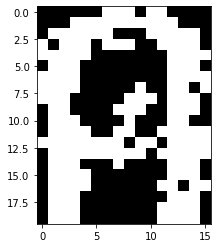

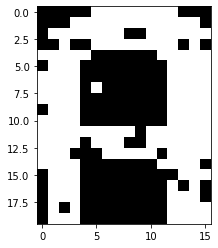

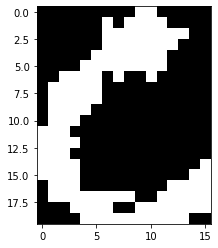

In [5]:
from principal_DBN_alpha import init_DBN, train_DBN, generer_image_DBN

dbn = init_DBN([input_size, 100, 50])
dbn = train_DBN(dbn, 1000, 1e-1, 32, 
                ds=BinaryAlphaDigitsDataset(restrict_labels=restrict_labels,
                                            mode='train'))
generer_image_DBN(dbn, 301, 3)

# DNN

In [6]:
from principal_DNN_MNIST import init_DNN, entree_sortie_reseau, pretrain_DNN, retropropagation

input_size = 784 # 28 * 28
output_size = 10 # 10 numbers

In [7]:
dnn = init_DNN([input_size, 200, 100, 50, output_size])
dnn = pretrain_DNN(dnn, num_iterations=3, learning_rate=5e-2,
                   batch_size=32, ds=MNISTDataset(mode='train'))

Training RBM 1
Epoch 1 - Reconstruction error: 0.04138036526770889
Epoch 2 - Reconstruction error: 0.027397936375300438
Epoch 3 - Reconstruction error: 0.023932719313777686
Training RBM 2
Epoch 1 - Reconstruction error: 0.08345584548808502
Epoch 2 - Reconstruction error: 0.04901690036147832
Epoch 3 - Reconstruction error: 0.042792355539685384
Training RBM 3
Epoch 1 - Reconstruction error: 0.09763496264564743
Epoch 2 - Reconstruction error: 0.059022666056026164
Epoch 3 - Reconstruction error: 0.05207509810145357


In [8]:
dnn = retropropagation(dnn, num_iterations=3, learning_rate=5e-3,
                       batch_size=8, ds=MNISTDataset(mode='train'))

Epoch 1 - Loss: 1.9238752868310436
Epoch 2 - Loss: 1.8263645959982318
Epoch 3 - Loss: 1.8167066288386238


In [9]:
def test_DNN(dnn, ds):
    data = ds.data
    data = data.reshape((data.shape[0], -1))
    labels = ds.labels
    logits = entree_sortie_reseau(dnn, data)[-1]
    predictions = np.argmax(logits, axis=1)
    error_rate = np.mean(predictions != labels)
    return error_rate

In [10]:
error_rate = test_DNN(dnn, ds=MNISTDataset(mode='test'))
print(f"Error rate: {error_rate*100:.2f}%")

Error rate: 24.27%
